In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf  
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD

In [ ]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/...path.../Train",target_size=(244,244))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/...path.../Test", target_size=(244,244))

Found 5613 images belonging to 6 classes.
Found 600 images belonging to 6 classes.


In [ ]:
#Updated architecture with Batch Normalization and Drop out
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))

model.add(Flatten(name='flatten'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu', name='fc1'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', name='fc2'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax', name='output'))

opt = SGD(learning_rate=1e-4, momentum=0.9)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

In [ ]:
#original - no batch/dropout
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
model.add(Flatten(name='flatten'))
model.add(Dense(256, activation='relu', name='fc1'))
model.add(Dense(128, activation='relu', name='fc2'))
model.add(Dense(6, activation='softmax', name='output'))
opt = SGD(learning_rate=1e-4, momentum=0.9)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 batch_normalization_1 (Batc  (None, 224, 224, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                        

In [ ]:
import math
import numpy as np
BATCH_SIZE=32
TRAINING_SIZE = 5613
VALIDATION_SIZE = 600

# We take the ceiling because we do not drop the remainder of the batch
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / BATCH_SIZE))

steps_per_epoch = compute_steps_per_epoch(TRAINING_SIZE)
val_steps = compute_steps_per_epoch(VALIDATION_SIZE)
print(steps_per_epoch)
print(val_steps)

176
19


In [ ]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True)
  
#history = model.fit(generator=traindata, validation_data= testdata, epochs = 25, validation_data =(val_images, val_labels),callbacks =[earlystopping])
hist = model.fit(
    traindata, 
    steps_per_epoch = 176, 
    epochs = 100, 
    validation_data = testdata, 
    validation_steps = 19,
    callbacks = [earlystopping]
)

Epoch 1/100
176/176 [==============================] - 4006s 23s/step - loss: 0.6008 - accuracy: 0.1969 - val_loss: 0.7956 - val_accuracy: 0.1750
Epoch 2/100
176/176 [==============================] - 107s 604ms/step - loss: 0.4862 - accuracy: 0.2605 - val_loss: 0.4662 - val_accuracy: 0.2633
Epoch 3/100
176/176 [==============================] - 109s 620ms/step - loss: 0.4545 - accuracy: 0.3182 - val_loss: 0.3994 - val_accuracy: 0.4200
Epoch 4/100
176/176 [==============================] - 111s 629ms/step - loss: 0.4244 - accuracy: 0.3814 - val_loss: 0.3775 - val_accuracy: 0.4650
Epoch 5/100
176/176 [==============================] - 111s 630ms/step - loss: 0.4073 - accuracy: 0.4242 - val_loss: 0.3686 - val_accuracy: 0.4617
Epoch 6/100
176/176 [==============================] - 111s 630ms/step - loss: 0.3958 - accuracy: 0.4361 - val_loss: 0.3723 - val_accuracy: 0.4650
Epoch 7/100
176/176 [==============================] - 111s 630ms/step - loss: 0.3822 - accuracy: 0.4709 - val_loss: 0.

In [ ]:
model.save("/content/drive/MyDrive/project/final models/gabor-nette-batchdrop02.h5")

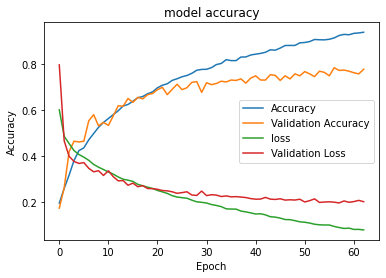

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

Text(0.5, 0, 'epoch')

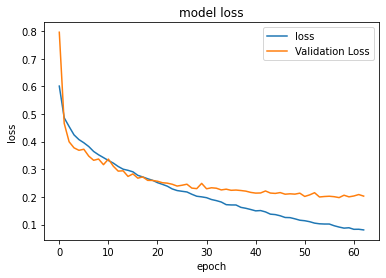

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(["loss","Validation Loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
#predict the label for one image
from keras.preprocessing import image
img = image.load_img("/...path...",target_size=(224,224))
img = np.asarray(img)
#plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("/...path.../model-name.h5")
output = saved_model.predict(img)


In [ ]:
testdata1 = tsdata.flow_from_directory(directory="/...path...", target_size=(244,244))
testdata2 = tsdata.flow_from_directory(directory="/...path...", target_size=(244,244))
testdata3 = tsdata.flow_from_directory(directory="/...path...", target_size=(244,244))
testdata4 = tsdata.flow_from_directory(directory="/...path...", target_size=(244,244))
testdata5 = tsdata.flow_from_directory(directory="/...path...", target_size=(244,244))
testdata6 = tsdata.flow_from_directory(directory="/...path...", target_size=(244,244))
testdata7 = tsdata.flow_from_directory(directory="/...path... ", target_size=(244,244))

Found 600 images belonging to 6 classes.
Found 600 images belonging to 6 classes.
Found 600 images belonging to 6 classes.
Found 600 images belonging to 6 classes.
Found 600 images belonging to 6 classes.
Found 600 images belonging to 6 classes.
Found 60 images belonging to 6 classes.


In [ ]:
#test the model on different datasets
print("evaluation on original test dataset: ")
a=model.evaluate(testdata1)
print("evaluation on stylized test dataset: ")
b=model.evaluate(testdata2)
print("evaluation on gaussian noise test dataset (Standard deviation = 0.001): ")
e=model.evaluate(testdata5)
print("evaluation on gaussian noise test dataset (Standard deviation = 0.01): ")
d=model.evaluate(testdata4)
print("evaluation on gaussian noise test dataset (Standard deviation = 0.1): ")
c=model.evaluate(testdata3)
print("evaluation on edges test dataset: ")
f=model.evaluate(testdata6)
print("evaluation on o.o.d. test dataset: ")
g=model.evaluate(testdata7)


evaluation on original test dataset: 
19/19 [==============================] - 4s 196ms/step - loss: 0.1974 - accuracy: 0.7717
evaluation on stylized test dataset: 
19/19 [==============================] - 441s 24s/step - loss: 0.5111 - accuracy: 0.4183
evaluation on gaussian noise test dataset (Standard deviation = 0.001): 
19/19 [==============================] - 477s 26s/step - loss: 0.2320 - accuracy: 0.7083
evaluation on gaussian noise test dataset (Standard deviation = 0.01): 
19/19 [==============================] - 471s 26s/step - loss: 0.2884 - accuracy: 0.6133
evaluation on gaussian noise test dataset (Standard deviation = 0.1): 
19/19 [==============================] - 471s 26s/step - loss: 0.4888 - accuracy: 0.3650
evaluation on edges test dataset: 
19/19 [==============================] - 470s 26s/step - loss: 0.8312 - accuracy: 0.2300
evaluation on o.o.d. test dataset: 
2/2 [==============================] - 31s 30s/step - loss: 0.4380 - accuracy: 0.5500


In [ ]:
#convert images to jpg (replace the last * in -->glob.glob("/content/drive/MyDrive/...path.../*.*") with the specific file format if the original file format is the same for all images in that folder (eg JPEG/PNG etc))
from PIL import Image
import os
import glob
import cv2
j=0
for i in glob.glob("/content/drive/...folder path.../*.*"):
  j=j+1
  im = Image.open(i)
  rgb_im = im.convert("RGB")
  rgb_im.save("/content/drive/MyDrive/...folder path.../" + str(j) + ".jpg")